<h1 align="center">AtliQo Bank Credit Card Launch: Phase 1</h1>

Objective: Analyze customers' transactions and credit profiles to figure out a target group for the launch of AtliQo bank credit card

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h1 style="color:purple" align="center">Data Import<h1>

We got the dataset in two formats (1) CSV (2) MySQL. we are going to use MYSQL dataset.

### Import Data from MySQL

In [3]:
import mysql.connector

In [4]:
!pip install pandas mysql-connector-python

In [5]:
!pip install pandas pymysql

In [6]:
import mysql.connector

In [7]:
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    passwd='Mps@12345',
    database='e_master_card'
)

In [8]:
df_cust = pd.read_sql('select * from customers', conn)
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563,Married
4,5,Advait Malik,Male,48,City,Consultant,39406,Married


In [9]:
df_trans = pd.read_sql('select * from Transactions', conn)
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [10]:
df_cp = pd.read_sql('select * from credit_profiles', conn)
df_cp.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


<h1 style="color:purple" align="center">Explore Customers Table<h1>

In [11]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,132439.799000
std,288.819436,15.666155,113706.313793
min,1.000000,1.000000,0.000000
25%,250.750000,26.000000,42229.750000
50%,500.500000,32.000000,107275.000000
75%,750.250000,46.000000,189687.500000
max,1000.000000,135.000000,449346.000000


In [12]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

<h2 style="color:Blue">1. Analyze Income Column<h2>

In [13]:
df_cust.annual_income.isnull().sum()

0

In [14]:
df_cust[df_cust['annual_income'].isnull()].head(4)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [15]:
occupation_wise_inc_median = df_cust.groupby('occupation')['annual_income'].median()
occupation_wise_inc_median

occupation
Accountant              65265.0
Artist                  44915.0
Business Owner         254881.0
Consultant              51175.0
Data Scientist         127889.0
Freelancer              45189.5
Fullstack Developer     74457.0
Name: annual_income, dtype: float64

In [16]:
occupation_wise_inc_median['Artist']

44915.0

In [17]:
def get_median_val(row):
    if pd.isnull(row['annual_income']):
        return occupation_wise_inc_median[row['occupation']]
    else:
        return row['annual_income']
        

In [18]:
get_median_val({'cust_id': 15, "occupation": 'Artist', 'annual_income': 678})

678

In [19]:
df_cust['annual_income'] = df_cust.apply(get_median_val, axis = 1)


In [20]:
df_cust['annual_income'] = df_cust.apply(
lambda row: occupation_wise_inc_median[row['occupation']] if pd.isnull(row['annual_income']) else row['annual_income'],
axis = 1
)

In [21]:
df_cust.iloc[[14,82]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,0,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,0,Single


In [22]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

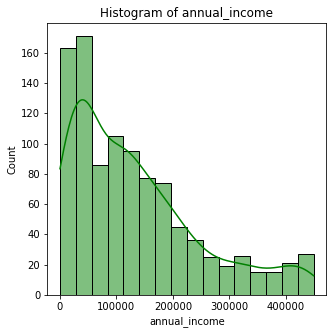

In [23]:
plt.figure(figsize=(5,5))
sns.histplot(df_cust['annual_income'], kde = True, color = 'Green', label = "Data")
plt.title('Histogram of annual_income')
plt.show()

In [24]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,132439.799000
std,288.819436,15.666155,113706.313793
min,1.000000,1.000000,0.000000
25%,250.750000,26.000000,42229.750000
50%,500.500000,32.000000,107275.000000
75%,750.250000,46.000000,189687.500000
max,1000.000000,135.000000,449346.000000


In [25]:
df_cust[df_cust.annual_income<100].count()

cust_id           60
name              60
gender            60
age               60
location          60
occupation        60
annual_income     60
marital_status    60
dtype: int64

In [26]:
for index, row in df_cust.iterrows():
    if row['annual_income']< 100:
        df_cust.at[index, 'annual_income'] = occupation_wise_inc_median[row['occupation']]

In [27]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,140137.395500
std,288.819436,15.666155,110450.464107
min,1.000000,1.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,46.000000,195514.250000
max,1000.000000,135.000000,449346.000000


In [28]:
occupation_wise_inc_mean = df_cust.groupby('occupation')['annual_income'].mean()
occupation_wise_inc_mean

occupation
Accountant              64123.562500
Artist                  45239.842105
Business Owner         268119.833910
Consultant              59927.257732
Data Scientist         136208.603261
Freelancer              76293.089912
Fullstack Developer     78618.385135
Name: annual_income, dtype: float64

In [29]:
occupation_wise_inc_mean.index

Index(['Accountant', 'Artist', 'Business Owner', 'Consultant',
       'Data Scientist', 'Freelancer', 'Fullstack Developer'],
      dtype='object', name='occupation')

In [30]:
occupation_wise_inc_mean.values

array([ 64123.5625    ,  45239.84210526, 268119.83391003,  59927.25773196,
       136208.60326087,  76293.08991228,  78618.38513514])

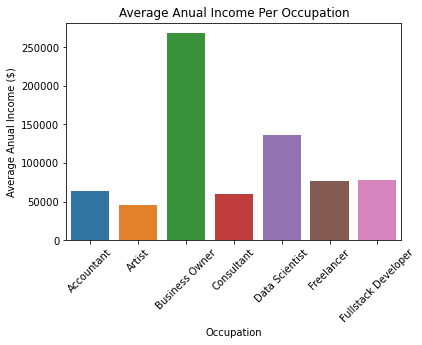

In [31]:
sns.barplot(x=occupation_wise_inc_mean.index, y = occupation_wise_inc_mean.values)
plt.xticks(rotation =45)
plt.title('Average Anual Income Per Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Anual Income ($)')
plt.show()

In [32]:
df_cust.columns

Index(['cust_id', 'name', 'gender', 'age', 'location', 'occupation',
       'annual_income', 'marital_status'],
      dtype='object')

In [33]:
categorial_columns = ['gender', 'location', 'occupation', 'marital_status']

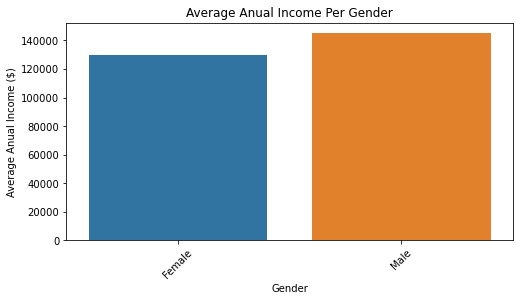

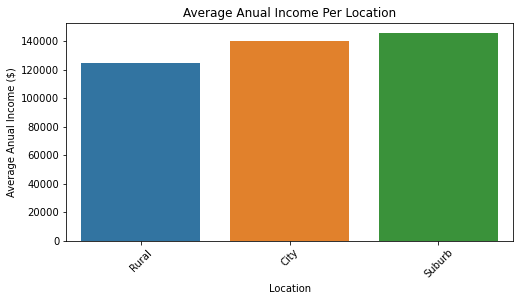

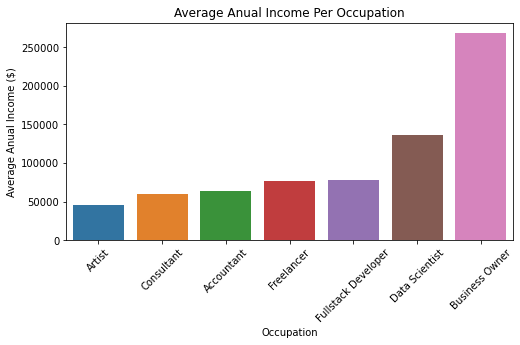

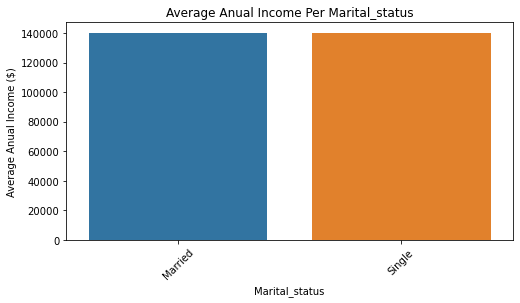

In [34]:
for cal in categorial_columns:
    plt.figure(figsize = (8,4))
    avg_income_per_group = df_cust.groupby(cal)['annual_income'].mean().sort_values()
    sns.barplot(x= avg_income_per_group.index, y = avg_income_per_group.values)
    plt.xticks(rotation = 45)
    plt.title(f'Average Anual Income Per {cal.capitalize()}')
    plt.xlabel(cal.capitalize())
    plt.ylabel('Average Anual Income ($)')
    plt.show()

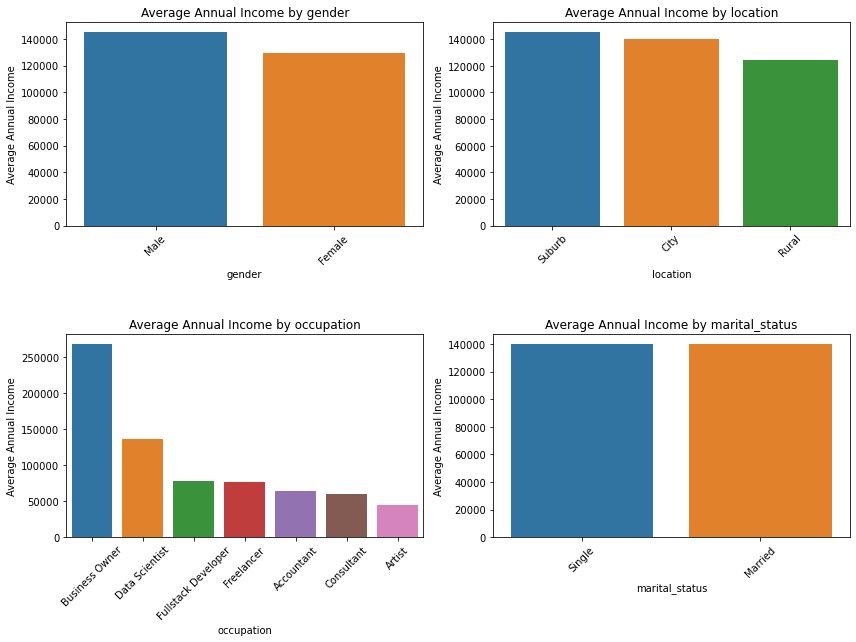

In [35]:
# List of categorical columns
cat_cols = ['gender', 'location', 'occupation', 'marital_status']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_income_by_category = df_cust.groupby(cat_col)['annual_income'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_income_by_category.sort_values(by='annual_income', ascending=False)
    
    sns.barplot(x=cat_col, y='annual_income', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average Annual Income by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average Annual Income')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

# 2. Analyze Age Colmun

# Handle Null Values: Age Column

First let us check if there are any NULL values in Age column

In [36]:
df_cust.age.isnull().sum()

0

In [37]:
df_cust.age.describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

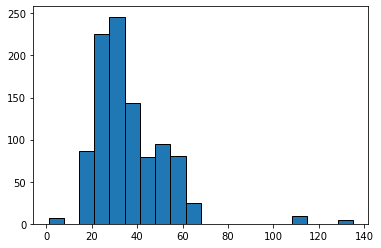

In [38]:
plt.hist(df_cust.age, bins = 20, edgecolor = 'black')
plt.show()

In [39]:
outliers =df_cust[(df_cust['age']<15) | (df_cust['age']>80)]
outliers

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [40]:
median_age_per_occupation = df_cust.groupby('occupation')['age'].median()
median_age_per_occupation

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [41]:
for index, row in outliers.iterrows():
    df_cust.at[index, 'age'] = median_age_per_occupation[row['occupation']]

In [42]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,35.541500,140137.395500
std,288.819436,12.276634,110450.464107
min,1.000000,18.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,44.250000,195514.250000
max,1000.000000,64.000000,449346.000000


In [43]:
#Define the bin age and labels

bin_edges = [17, 25, 48, 65] #Adjustd as needed
bin_labels = ['18-25', '26-48','49-65']

#use the cut function to bin and label the age column

df_cust['age_group'] = pd.cut(df_cust['age'], bins = bin_edges, labels = bin_labels)
df_cust.head(4)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25


In [44]:
age_group_count = df_cust.age_group.value_counts(normalize = True)*100
age_group_count

26-48    56.7
18-25    24.6
49-65    18.7
Name: age_group, dtype: float64

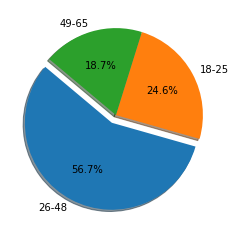

In [45]:
plt.pie(
    age_group_count, 
        labels=age_group_count.index, 
    autopct ='%1.1f%%', shadow = True, explode = (0.1,0,0), startangle = 140)
plt.show()

In [46]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [47]:
df_cust.location.value_counts()

City      683
Suburb    232
Rural      85
Name: location, dtype: int64

In [48]:
df_cust.gender.value_counts()

Male      674
Female    326
Name: gender, dtype: int64

In [49]:
customer_location_gender = df_cust.groupby(['location', 'gender']).size().unstack()
customer_location_gender

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


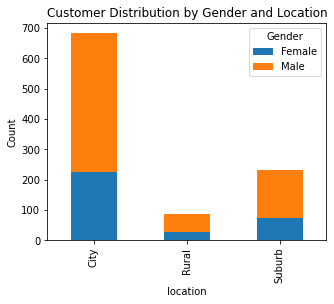

In [50]:
customer_location_gender.plot(kind = 'bar', stacked = True, figsize = (5,4))

plt.legend(title = "Gender")
plt.xlabel('location')
plt.ylabel('Count')
plt.title('Customer Distribution by Gender and Location')
plt.show()

# Explore Credit Score Table

In [51]:
df_cp.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [52]:
df_cp.shape

(1004, 6)

In [53]:
df_cust.shape

(1000, 9)

In [54]:
df_cp.cust_id.unique()

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

In [55]:
df_cp.cust_id.nunique()

1000

In [56]:
df_cp[df_cp['cust_id'].duplicated(keep = False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [57]:
df_cp_clean_1 = df_cp.drop_duplicates(subset = 'cust_id', keep = 'last')
df_cp_clean_1.shape

(1000, 6)

In [58]:
df_cp_clean_1.shape

(1000, 6)

In [59]:
df_cp_clean_1.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [60]:
df_cp_clean_1[df_cp_clean_1['credit_limit'].isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [61]:
df_cp_clean_1.credit_limit.value_counts()

500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: credit_limit, dtype: int64

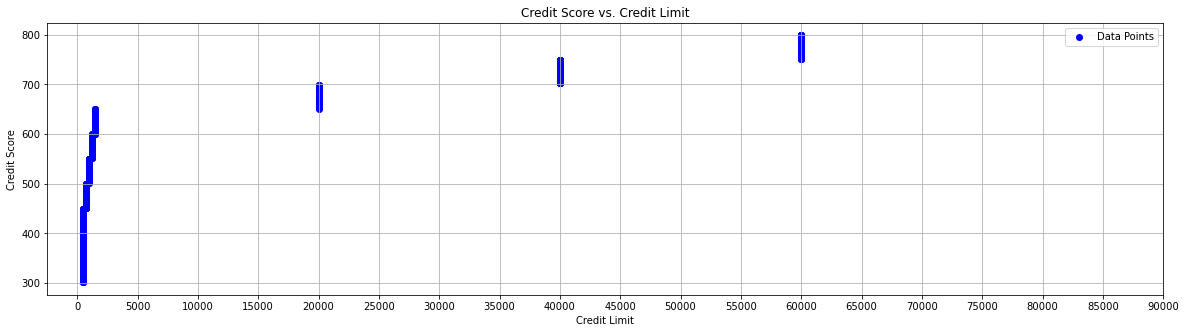

In [62]:
plt.figure(figsize = (20,5))
plt.scatter(df_cp_clean_1.credit_limit, df_cp_clean_1.credit_score, c = 'blue', marker = 'o', label = 'Data Points')

plt.title('Credit Score vs. Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Credit Score')
plt.xticks(range(0,90001,5000))
plt.grid(True)
plt.legend()

plt.show()

In [63]:
bin_ranges = [300, 450, 500, 550, 600, 650, 700, 750, 800]

bin_labels = [f'{start}-{end-1}' for start, end in zip(bin_ranges, bin_ranges[1:])]
df_cp_clean_1['credit_score_range']= pd.cut(df_cp_clean_1['credit_score'], bins = bin_ranges, labels = bin_labels, include_lowest = True, right=False)

In [64]:
df_cp_clean_1.shape

(1000, 7)

In [65]:
mode_df = df_cp_clean_1.groupby('credit_score_range')['credit_limit'].agg(lambda x: x.mode().iloc[0]).reset_index()

In [66]:
mode_df

,credit_score_range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [67]:
df_cp_clean_1[df_cp_clean_1['credit_limit'].isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
64,65,734,0.473715,13631.0,0.0,NaN,700-749
772,769,563,0.865592,898.0,3.0,NaN,550-599
211,212,337,0.608700,226.0,4.0,NaN,300-449


In [68]:
df_cp_clean_1

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749
...,...,...,...,...,...,...,...
999,996,564,0.702963,688.0,2.0,1250.0,550-599
1000,997,774,0.465462,17139.0,0.0,60000.0,750-799
1001,998,529,0.585856,386.0,3.0,1000.0,500-549
1002,999,725,0.249670,6973.0,2.0,40000.0,700-749


In [69]:
df_cp_clean_2= pd.merge(df_cp_clean_1, mode_df, on = 'credit_score_range', suffixes = ("", "_mod"))
df_cp_clean_2

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mod
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
2,7,747,0.523965,15544.0,4.0,40000.0,700-749,40000.0
3,17,702,0.894423,18444.0,0.0,40000.0,700-749,40000.0
4,28,729,0.149748,3453.0,2.0,40000.0,700-749,40000.0
...,...,...,...,...,...,...,...,...
995,985,770,0.628088,33405.0,2.0,60000.0,750-799,60000.0
996,990,772,0.259958,11937.0,2.0,60000.0,750-799,60000.0
997,993,782,0.477170,20305.0,2.0,60000.0,750-799,60000.0
998,997,774,0.465462,17139.0,0.0,60000.0,750-799,60000.0


In [70]:
 df_cp_clean_2[df_cp_clean_2['credit_limit'].isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mod
240,141,520,0.210682,145.0,3.0,NaN,500-549,1000.0
988,954,783,0.867421,46451.0,0.0,NaN,750-799,60000.0
693,115,619,0.128910,151.0,1.0,NaN,600-649,1500.0


In [71]:
df_cp_clean_3 = df_cp_clean_2.copy()
df_cp_clean_3['credit_limit'].fillna(df_cp_clean_2['credit_limit_mod'], inplace = True)
df_cp_clean_3.shape

(1000, 8)

In [72]:
df_cp_clean_3.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
credit_limit_mod                  0
dtype: int64

In [73]:
df_cp_clean_3.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mod
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000,60000.000000


<AxesSubplot:xlabel='outstanding_debt'>

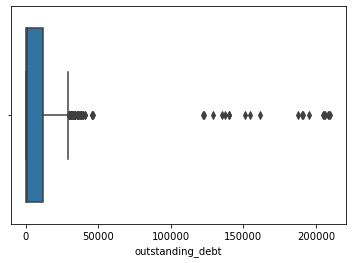

In [74]:
sns.boxplot(x=df_cp_clean_3.outstanding_debt)

In [75]:
df_cp_clean_3[df_cp_clean_3['outstanding_debt']> df_cp_clean_3['credit_limit']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mod
6,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
12,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
35,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
41,302,722,0.608076,122402.0,4.0,40000.0,700-749,40000.0
101,726,737,0.136048,205404.0,4.0,40000.0,700-749,40000.0
142,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
363,205,303,0.364360,187849.0,0.0,500.0,300-449,500.0
406,351,320,0.285081,150860.0,0.0,500.0,300-449,500.0
474,637,420,0.323984,140063.0,4.0,500.0,300-449,500.0
604,647,498,0.658087,128818.0,3.0,750.0,450-499,750.0


In [76]:
df_cp_clean_3.loc[df_cp_clean_3['outstanding_debt']> df_cp_clean_3['credit_limit'], "outstanding_debt"]= df_cp_clean_3['credit_limit']

In [77]:
df_cp_clean_3[df_cp_clean_3['outstanding_debt']> df_cp_clean_3['credit_limit']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mod


In [78]:
df_cp_clean_3.loc[[6,12]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mod
6,39,734,0.573023,40000.0,3.0,40000.0,700-749,40000.0
12,94,737,0.739948,40000.0,2.0,40000.0,700-749,40000.0


In [79]:
df_cp_clean_3.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mod
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,6850.084000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,10683.473561,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,541.500000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,10924.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,60000.000000,4.000000,60000.00000,60000.000000


In [80]:
df_cp_clean_3.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mod
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
2,7,747,0.523965,15544.0,4.0,40000.0,700-749,40000.0
3,17,702,0.894423,18444.0,0.0,40000.0,700-749,40000.0
4,28,729,0.149748,3453.0,2.0,40000.0,700-749,40000.0


In [81]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [82]:
df_merged = df_cust.merge(df_cp_clean_3, on = 'cust_id', how = 'inner')
df_merged

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mod
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26.0,City,Freelancer,45189.5,Married,26-48,564,0.702963,688.0,2.0,1250.0,550-599,1250.0
996,997,Aarav Dhawan,Male,55.0,City,Business Owner,290061.0,Single,49-65,774,0.465462,17139.0,0.0,60000.0,750-799,60000.0
997,998,Rehan Jha,Male,29.0,City,Fullstack Developer,139141.0,Married,26-48,529,0.585856,386.0,3.0,1000.0,500-549,1000.0
998,999,Amara Rathore,Female,47.0,City,Business Owner,254881.0,Married,26-48,725,0.249670,6973.0,2.0,40000.0,700-749,40000.0


In [83]:
df_merged[['credit_score', 'credit_limit']].corr()

,credit_score,credit_limit
credit_score,1.000000,0.847952
credit_limit,0.847952,1.000000


In [84]:
df_merged[['credit_score', 'credit_limit']].corr()

,credit_score,credit_limit
credit_score,1.000000,0.847952
credit_limit,0.847952,1.000000


In [85]:
df_merged.columns

Index(['cust_id', 'name', 'gender', 'age', 'location', 'occupation',
       'annual_income', 'marital_status', 'age_group', 'credit_score',
       'credit_utilisation', 'outstanding_debt',
       'credit_inquiries_last_6_months', 'credit_limit', 'credit_score_range',
       'credit_limit_mod'],
      dtype='object')

In [86]:
numerical_cols = ['credit_score', 'credit_utilisation', 'outstanding_debt', 'credit_limit', 'annual_income']

correlation_matrix = df_merged[numerical_cols].corr()
correlation_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income
credit_score,1.000000,-0.070445,0.680654,0.847952,0.575685
credit_utilisation,-0.070445,1.000000,0.192838,-0.080493,-0.086816
outstanding_debt,0.680654,0.192838,1.000000,0.810581,0.555077
credit_limit,0.847952,-0.080493,0.810581,1.000000,0.684627
annual_income,0.575685,-0.086816,0.555077,0.684627,1.000000


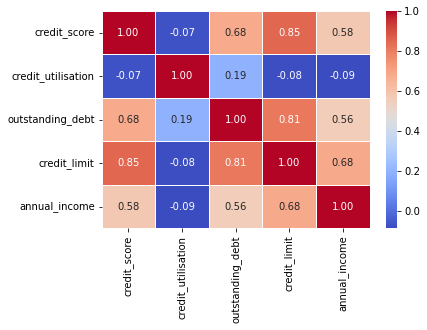

In [87]:
sns.heatmap(correlation_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm', linewidths = 0.9)
plt.show()

# Transactional Table

In [88]:
df_trans

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499996,499997,569,2023-09-05,53022,Meesho,Fashion & Apparel,Net Banking
499997,499998,57,2023-09-05,224,None,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


In [89]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [90]:
df_trans.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [91]:
df_trans[df_trans.platform.isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,None,Electronics,Net Banking
418,419,383,2023-01-01,338,None,Electronics,Credit Card
607,608,421,2023-01-01,700,None,Electronics,Phonepe
844,845,945,2023-01-01,493,None,Sports,Credit Card
912,913,384,2023-01-01,85,None,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,None,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,None,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,None,Sports,Net Banking
499833,499834,616,2023-09-05,97,None,Fashion & Apparel,Credit Card


In [92]:
df_trans.platform.unique()

array(['Flipkart', 'Alibaba', 'Shopify', 'Amazon', 'Ebay', 'Meesho',
       'Cred', None], dtype=object)

In [93]:
df_trans.platform.mode()[0]

'Amazon'

In [94]:
df_trans.platform.value_counts()

Amazon      151443
Flipkart    122660
Alibaba      73584
Meesho       73271
Shopify      39416
Cred         24741
Ebay          9944
Name: platform, dtype: int64

In [95]:
df_trans.platform.fillna(df_trans.platform.mode()[0], inplace = True)

In [96]:
df_trans.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

<AxesSubplot:xlabel='count', ylabel='product_category'>

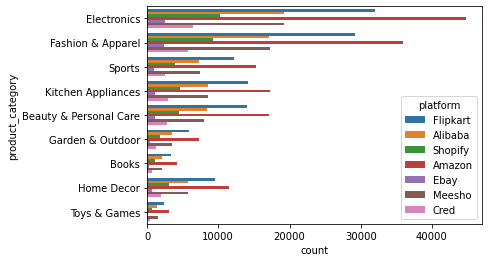

In [97]:
sns.countplot(y='product_category', hue = 'platform', data = df_trans)

In [98]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [99]:
df_trans_zero= df_trans[df_trans.tran_amount==0]
df_trans_zero

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499326,499327,695,2023-09-05,0,Amazon,Electronics,Credit Card
499494,499495,295,2023-09-05,0,Amazon,Electronics,Credit Card
499708,499709,141,2023-09-05,0,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [100]:
df_trans_zero.shape

(4734, 7)

In [101]:
df_trans_zero.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card


In [102]:
df_trans_zero[['platform', 'product_category', 'payment_type']].head()

,platform,product_category,payment_type
120,Amazon,Electronics,Credit Card
141,Amazon,Electronics,Credit Card
517,Amazon,Electronics,Credit Card
533,Amazon,Electronics,Credit Card
586,Amazon,Electronics,Credit Card


In [103]:
df_trans_1 = df_trans[(df_trans.platform =='Amazon') & (df_trans.product_category=='Electronics') &(df_trans.payment_type=='Credit Card')]
df_trans_1.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card


In [104]:
median_to_replace = df_trans_1[df_trans_1.tran_amount>0].tran_amount.median()
median_to_replace

554.0

In [105]:
df_trans['tran_amount'].replace(0,median_to_replace, inplace = True)
df_trans.tran_amount.isnull().sum()

0

In [106]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711634,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


<AxesSubplot:xlabel='tran_amount', ylabel='Count'>

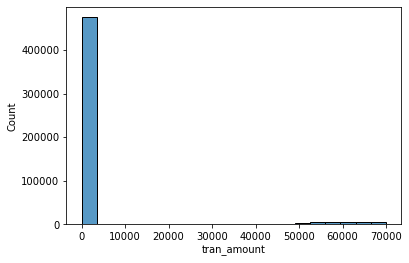

In [107]:
sns.histplot(df_trans.tran_amount, bins = 20)

In [108]:
Q1, Q3 = df_trans['tran_amount'].quantile([0.25, 0.75])

IQR = Q3-Q1

lower = Q1 - 2*IQR
upper = Q3 + 2*IQR
lower, upper 

(-628.0, 1107.0)

In [109]:
df_trans_outliers = df_trans[df_trans.tran_amount>=upper]
df_trans_outliers.shape

(25000, 7)

In [110]:
df_trans_normal = df_trans[df_trans.tran_amount<upper]
df_trans_normal.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [111]:
tran_mean_per_category = df_trans_normal.groupby('product_category')['tran_amount'].mean()
tran_mean_per_category

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [112]:
df_trans.loc[df_trans_outliers.index, 'tran_amount'] = df_trans_outliers['product_category'].map(tran_mean_per_category)

In [113]:
df_trans.loc[df_trans_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,176.773288,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,64.553463,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,269.181631,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay


In [114]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,240.672998
std,144337.711634,288.641924,241.696597
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,64.553463
50%,250000.500000,502.000000,133.000000
75%,375000.250000,752.000000,349.000000
max,500000.000000,1000.000000,999.000000


<AxesSubplot:xlabel='tran_amount', ylabel='Count'>

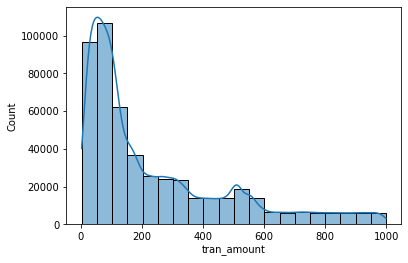

In [115]:
sns.histplot(df_trans.tran_amount, kde = True, bins = 20)

In [116]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33.0,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68.0,Amazon,Fashion & Apparel,Net Banking


<AxesSubplot:xlabel='payment_type', ylabel='count'>

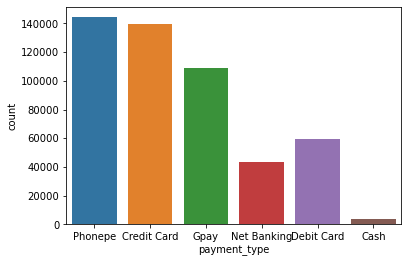

In [117]:
sns.countplot(x = df_trans.payment_type)

In [118]:
df_merged_2= pd.merge(df_merged, df_trans, on='cust_id', how = 'inner')
df_merged_2.shape

(500000, 22)

In [119]:
df_merged_2.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mod,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card


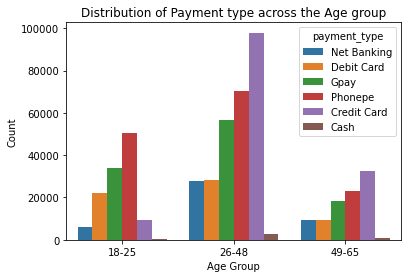

In [120]:
sns.countplot(x = 'age_group', hue = 'payment_type', data = df_merged_2)
plt.title('Distribution of Payment type across the Age group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

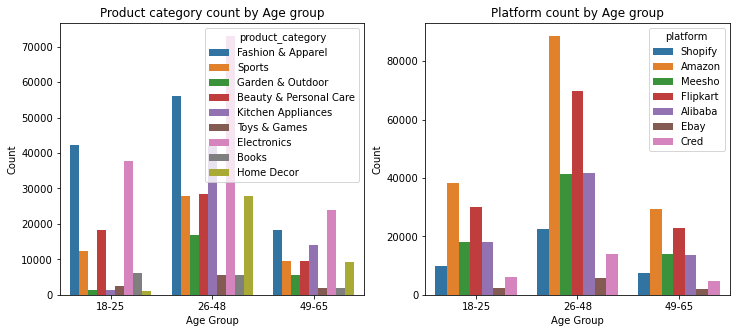

In [121]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize= (12,5))

sns.countplot(x= 'age_group', hue = 'product_category', data = df_merged_2, ax = ax1)
ax1.set_title('Product category count by Age group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Count')
ax1.legend(title = 'product_category', loc = 'upper right')

sns.countplot(x= 'age_group', hue = 'platform', data = df_merged_2, ax = ax2)
ax2.set_title('Platform count by Age group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Count')
ax2.legend(title = 'platform', loc = 'upper right')
plt.show()

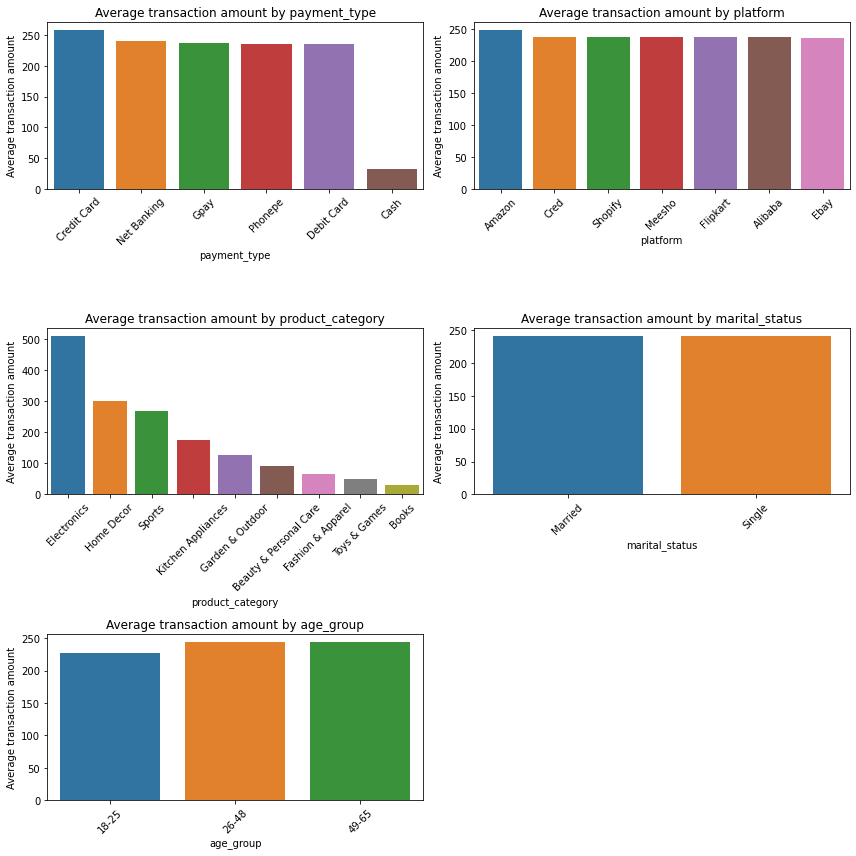

In [122]:
# List of categorical columns
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_tran_amount_by_category = df_merged_2.groupby(cat_col)['tran_amount'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)
    
    sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average transaction amount by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average transaction amount')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

<h2 align ="center" style ="color:purple">Phase 2: AtliQ0 Bank Credit Card Project</h2>

<h3>Busniness Anaylsis and launch of AB testing: Targetting Untapped Market</h3>

<h4>Insights specific to customers with age group of 18 - 25</h4>

1. People with age group of 18 -25 accounts to ~25% of customer base in the data.
2. Avg annual income of this age group is less than 50k.
3. They don't have much credit history which is getting reflected in their credit score and max credit limit.
4. Usage of credit cards as payment type is relatively low compared to other groups.
5. Avg transaction amount made with credit cards is also low compared to other groups
6. Top 3 most used shopping products categories : Electronics, Fashion & Apparel, Beauty & Personal care.

![Analysis Image]("analysis.png")

# (1) Pre Campaign

We want to do a trial run for our new credit card. For this we need to figure out (1) How many customers do we need for our A/B testing. We will form a control and test group. For both of these groups we can figure out number of customers we need based on the statistical power and effect size that we agree upon after discussing with business.

In [123]:
#Import required libraries

import statsmodels.stats.api as sms
import statsmodels.api as sm
from scipy import stats as st
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [124]:
alpha = 0.05
power = 0.8
effect_size = 0.2


sms.tt_ind_solve_power(
        effect_size = effect_size,
        alpha = alpha,
        power = power,
        ratio = 1,
        alternative = 'two-sided'
)


393.4056989990322

For effect size 2 we need 393 customers. We have to keep in mind budgeting restrictions while running this campaign hence let us run this for different effect sizes and discuss with business to find out which sample size would be optimal

In [127]:
#calculate the required sample size for different sizes
effect_sizes = [0.1, 0.2, 0.3, 0.4, 0.5,1]# standard deviations greater than control group

for effect_size in effect_sizes:
    sample_size = sms.tt_ind_solve_power(
        effect_size = effect_size,
        alpha = alpha,
        power = power,
        ratio = 1,
        alternative = 'two-sided'
        )
    print(f"Effect Size:{effect_size}, Required Sample Size: {sample_size: .0f} customers")

Effect Size:0.1, Required Sample Size:  1571 customers
Effect Size:0.2, Required Sample Size:  393 customers
Effect Size:0.3, Required Sample Size:  175 customers
Effect Size:0.4, Required Sample Size:  99 customers
Effect Size:0.5, Required Sample Size:  64 customers
Effect Size:1, Required Sample Size:  17 customers


Based on business requirements, the test should be capable of detecting a minimum 0.4 standard deviation difference between the control and test groups. For the effect size 0.4, we need 100 customers and when we discussed with business, 100 customers is ok in terms of their budgeting constraints for this trail run

#### Forming control and test groups

1.We have identified approximately 246 customers within the age group of 18 to 25. From this pool, we will select 100 customers for the initial campaign launch.

2.The campaign is launched for 100 customers, as determined by the effective size calculation and by considering budgeting costs, and will run campaign for a duration of 2 months

3.Got a conversion rate of ~40% ( implies 40 out of 100 customers in test group started using credit card)

4.To maintain a similar sample size, a control group consisting of 40 customers will be created. Importantly, this control group will be completely exclusive of initial 100 customers used as test group.

5.So now we have 40 customers in each of control and test groups

##### At the end of the 2-month campaign period (from 09-10-23 to 11-10-23), we obtained daily data showing the average transaction amounts made by the entire group of 40 customers in both the control and test groups using existing and newly launched credit cards respectively

##### The key performance indicator (KPI) for this AB test aims to enhance average transaction amounts facilitated by the new card

# (2) Post-Campaign

## Two Sample Z Test for Our Hypothesis Testing

In [130]:
#Loading campaign result data
df = pd.read_csv('avg_transactions_after_campaign.csv')
df.head()

,campaign_date,control_group_avg_tran,test_group_avg_tran
0,2023-09-10,259.83,277.32
1,2023-09-11,191.27,248.68
2,2023-09-12,212.41,286.61
3,2023-09-13,214.92,214.85
4,2023-09-14,158.55,344.08


In [131]:
df.shape

(62, 3)

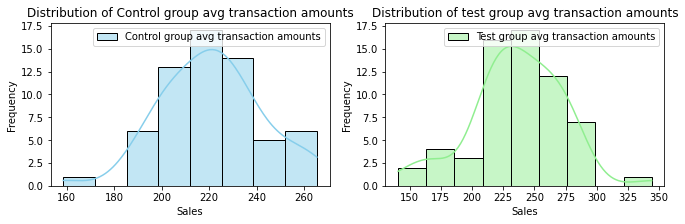

In [139]:
# Let's look at distributions of avg transactions amounts in both groups
# Create a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 3))

# Plot the distribution of Campaign A Sales
sns.histplot(df['control_group_avg_tran'], kde=True, color='skyblue', label='Control group avg transaction amounts', ax=ax1)
ax1.set_xlabel('Sales')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Control group avg transaction amounts')
ax1.legend()

# Plot the distribution of Campaign B Sales
sns.histplot(df['test_group_avg_tran'], kde=True, color='lightgreen', label='Test group avg transaction amounts', ax=ax2)
ax2.set_xlabel('Sales')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of test group avg transaction amounts')
ax2.legend()

# Show the plots
plt.show()

#### Perform Hypothesis Testing Using Two Sample Z-test

In [143]:
df.columns

Index(['campaign_date', 'control_group_avg_tran', 'test_group_avg_tran'], dtype='object')

In [147]:
df[df['control_group_avg_tran'] > df['test_group_avg_tran']]

,campaign_date,control_group_avg_tran,test_group_avg_tran
3,2023-09-13,214.92,214.85
8,2023-09-18,265.13,212.60
9,2023-09-19,232.88,207.63
16,2023-09-26,222.95,213.30
22,2023-10-02,238.39,203.10
23,2023-10-03,253.95,234.26
25,2023-10-05,239.47,216.37
26,2023-10-06,200.70,166.70
27,2023-10-07,200.91,170.01
28,2023-10-08,188.30,150.27


In [149]:
df[df['control_group_avg_tran'] > df['test_group_avg_tran']].shape[0]/df.shape[0]

0.2903225806451613

In [154]:
control_mean = round(df['control_group_avg_tran'].mean(),2)
control_std = round(df['control_group_avg_tran'].std(), 2)
control_mean, control_std 

(221.18, 21.36)

In [155]:
test_mean = round(df['test_group_avg_tran'].mean(), 2)
test_std = round(df['test_group_avg_tran'].std(), 2)
test_mean, test_std 

(235.98, 36.66)

In [157]:
sample_size = df.shape[0]
sample_size

62

### Test Using Rejection Region (i.e. Critical Z Value)

In [158]:
a = test_std**2/sample_size
b = control_std**2/sample_size

Z_score = (test_mean - control_mean)/np.sqrt(a+b)
Z_score

2.7466072001806734

In [159]:
critical_value = st.norm.ppf(1-alpha)
critical_value

1.6448536269514722

In [160]:
Z_score > critical_value

True

Since Z score is higher than critical Z value, we can reject the null hypothesis.

### Test Using p-Value

In [161]:
p_value = st.norm.cdf(Z_score)
p_value

0.9969892398080298

In [162]:
p_value< critical_value

True

Since p value is less than significance level (i.e. alpha), we can reject the null hypothesis.

### Using Ready Made API call

1.We will now use stats module from statmodels for doing Z-test

2.The order of passing control and test group data to sm.stats.ztest(test_data, control_data) defines the direction of the test and influences the test results.

3.When you pass test group data first, z-test module assumes that alternative hypothesis as mean of the test group is greater than the mean of the control group and conversely if you switch the order z-test module assumes alternative hypothesis as control group average is more than test group

4.In here we will be using order as sm.stats.ztest(test_group_data, control_group_data) based on our alternative hypothesis considered above.

5.By default z-test module in statmodels performs two tailed test. As we are doing one-tailed test in our case based on the direction and alternate hypothesis we have to set "alternative" parameter.

6.In out case based on test direction we will set "alternative" parameter to "larger"



#### How to choose right Alternative parameter

a.Two-tailed, meaning you are interested in identifying deviations across control and test groups in either direction 

b.larger, This is a one-tailed test, specifically looking for whether the first group is significantly larger than the second

c.smaller, This is another one-tailed test, specifically looking for whether the first group is significantly smaller than the second


In [175]:
#calculating Z-scroe with above considering 
z_score, p_value = sm.stats.ztest(df['test_group_avg_tran'], df['control_group_avg_tran'],alternative ="larger")
z_score, p_value

(2.7482973745691135, 0.002995282462202502)

In [176]:
#Calculating confidence interval for test group

test_group_CI = st.norm.interval(0.95, loc = test_mean, scale = test_std/np.sqrt(sample_size))
test_group_CI

(226.85475135624552, 245.10524864375446)